In [ ]:
import os
import pandas as pd
import numpy as np
import re   # Regular Expression  
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk  # Natural Language Tool Kit
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = '/content/drive/My Drive/moto.csv'
moto = pd.read_csv(df)
moto

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Rating,Comment,Review_text
0,3,Decent product,Loved the ColorGood FinishIt's bulky as far as...
1,5,Wonderful,Overall very nice phone with all the latest fe...
2,5,Perfect product!,Mobile is very good and performance I gifted m...
3,5,Just wow!,There are options out there that can give you ...
4,4,Wonderful,Phone is really good in terms of value. With M...
...,...,...,...
995,5,Just wow!,Excellent phone. Does well as per defined spec...
996,5,Terrific,Superb 👌READ MORE
997,5,Awesome,Awesome productREAD MORE
998,3,Does the job,Okay this phone was just lunched and I booked ...


In [ ]:
moto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       1000 non-null   int64 
 1   Comment      1000 non-null   object
 2   Review_text  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


## **Q1. What is the percentage of reviews have ratings equal to 5?**

In [ ]:
perc=pd.DataFrame(round(moto['Rating'].value_counts()/moto.shape[0]*100,2))
perc

,Rating
5,41.7
4,22.7
1,16.5
3,12.8
2,6.3


In [ ]:
print('Percentage of reviews having ratings equal to 5 is',
      perc['Rating'].iloc[0],"%")

Percentage of reviews having ratings equal to 5 is 41.7 %


Text(0.5, 1.0, 'COUNT OF NUMBER OF RATING ')

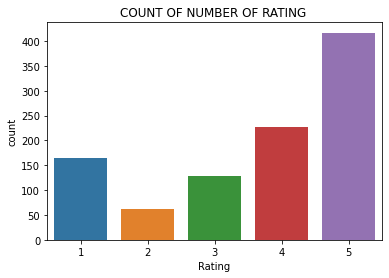

In [ ]:
sns.countplot('Rating',data=moto)
# displaying the title
plt.title("COUNT OF NUMBER OF RATING ")

## **Q2. How many unique comments are there? (Hint: Remove punctuations)**

In [ ]:
moto['Comment'].unique()

array(['Decent product', 'Wonderful', 'Perfect product!', 'Just wow!',
       'Very Good', 'Nice product', 'Terrific', 'Highly recommended',
       'Best smartphone for productivity.', 'Delightful', 'Fair', 'Good',
       'Value-for-money', 'Good choice', 'Pretty good', 'Brilliant',
       'Classy product', 'Super!', 'Not good',
       'Very Disappointed with this phone', 'Terrific purchase',
       'Best in the market!', 'Mind-blowing purchase', 'Awesome',
       'Excellent', 'Fabulous!', 'Great product', 'Good quality product',
       'Bad quality', 'Really Nice', 'Must buy!', 'Worth the money',
       'Very poor', 'Worthless', 'Simply awesome', 'Worth every penny',
       'Utterly Disappointed', 'Horrible', 'Hated it!',
       'Slightly disappointed',
       'Decent Phone - Avg Camera - Ok for Money', 'Just okay',
       'Does the job', 'Could be way better', 'Nice', 'Absolute rubbish!',
       'Worst Motorola G series Product Everrrr!!!',
       "Don't waste your money", 'Useless p

In [ ]:
moto['new_Comment']  = moto['Comment'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '').str.lower()
print('There are',len(moto['new_Comment'].unique()),
      'unique comments within the dataset without considering punctuations')

There are 67 unique comments within the dataset without considering punctuations


In [ ]:
#defining function to remove special characters
def remove_special_characters(text):
    result = re.sub(r'[^a-zA-Z0-9]', "", text)
    return result

#Using function to check number of unique comments
moto['new_Comment'] = moto['Comment'].apply(remove_special_characters)
print('There are',len(moto['new_Comment'].str.lower().unique()),
      'unique comments within the dataset without considering punctuations')

There are 67 unique comments within the dataset without considering punctuations


## **Q3. Draw word cloud of top 15 comments with rating less than 3? How many words/phases occur 13 times? Do not tokenise the words**

(-0.5, 1599.5, 799.5, -0.5)

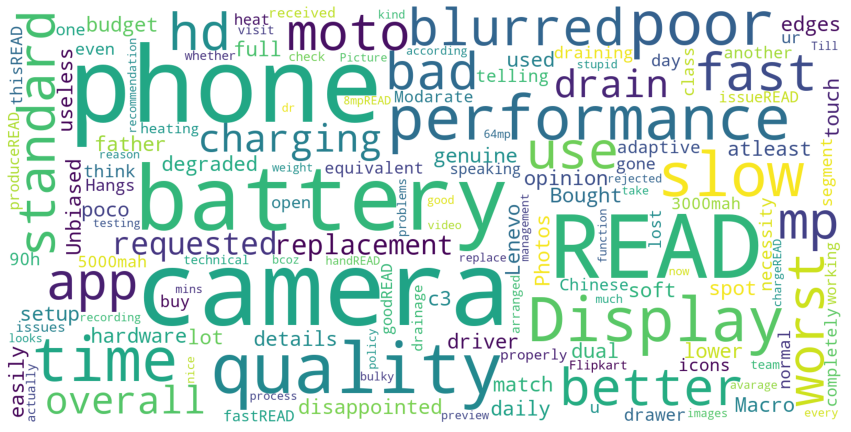

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Dataframe with less than 3 rating
rating_search = (1,2)
rating_lessthan3 = pd.DataFrame(moto[moto['Rating'].isin(rating_search)])
rl3_top15 = rating_lessthan3.sort_values(by='Rating', ascending=False).head(15)

# DOUBT - Whether the question is for words/phrases in 'Comment' column or 'Review_text' column.
# For now assuming the question is for words within top 15 comments

# Extract words from Comment for wordcloud
phrases = moto[ moto.Rating <3].sort_values(ascending=False,by='Rating').head(15)
phrases.head(3)
neg_words = []
for t in phrases.Review_text:  # Go to the "text" column of "neg_phrases" dataframe
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep = ' ')

# Create word cloud
word_cloud= WordCloud( width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(neg_text)  

# plot the WordCloud image                      
plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")


In [ ]:
rl3_top15

,Rating,Comment,Review_text,new_Comment
23,2,Not good,Unbiased and genuine opinion. Bought it for my...,Notgood
342,2,Could be way better,Camera quality is very bad as they are telling...,Couldbewaybetter
427,2,Not good,Very bad performance even for normal use. Hang...,Notgood
424,2,Not good,Most worst phone in this segment don't buy thi...,Notgood
422,2,Bad quality,While speaking and charging heat produceREAD MORE,Badquality
754,2,Expected a better product,camera and battery issueREAD MORE,Expectedabetterproduct
399,2,Could be way better,Battery drain fastREAD MORE,Couldbewaybetter
396,2,Could be way better,Poor performance.. overall not goodREAD MORE,Couldbewaybetter
392,2,Not good,Not working properly..READ MORE,Notgood
375,2,Terrible service from Flipkart,The phone I received is having very fast batte...,TerribleservicefromFlipkart


## **Q4. Which is the 2nd most frequent comment with rating equal to 2? Do not tokenise the words**

In [ ]:
moto[moto['Rating']==2]['Comment'].value_counts().head(5)

Bad quality                  13
Moderate                     12
Could be way better          11
Not good                     10
Expected a better product     8
Name: Comment, dtype: int64

### 2nd most frequent comment with rating equal to 2 is Moderate

## **Q5. Which is the most frequent comment with rating >= 3? Draw word cloud of top 15 comments. Do not tokenise the words**

In [ ]:
moto[moto['Rating']>=3]['Comment'].value_counts().head(15)

Wonderful                42
Just wow!                30
Very Good                30
Terrific                 30
Great product            29
Good                     29
Pretty good              27
Just okay                26
Value-for-money          26
Perfect product!         25
Must buy!                25
Fabulous!                25
Good quality product     24
Good choice              24
Mind-blowing purchase    24
Name: Comment, dtype: int64

Wonderful is the most frequent comment with rating >= 3

(-0.5, 1599.5, 799.5, -0.5)

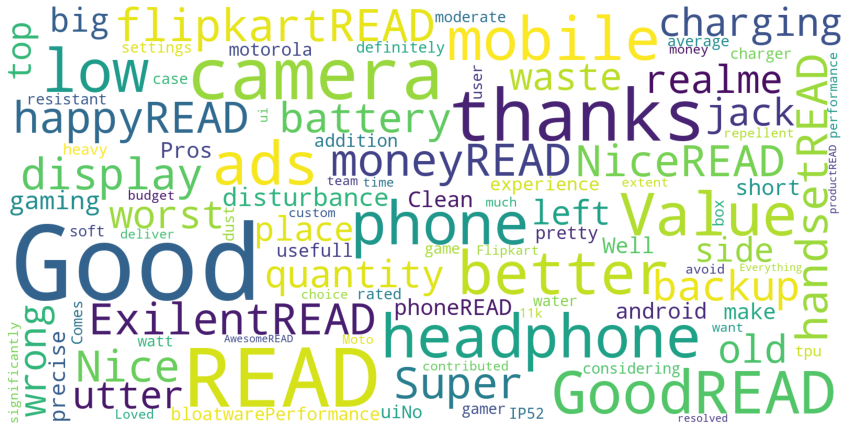

In [ ]:
phrases_2 = moto[moto.Rating >=3].sort_values(ascending=False,by='Rating').head(15)
phrases_2.head(3)
words_2 = []
for t in phrases_2.Review_text:  # Go to the "text" column of "neg_phrases" dataframe
    words_2.append(t)

text_2 = pd.Series(words_2).str.cat(sep = ' ')

word_cloud2= WordCloud( width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(text_2)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud2)
plt.axis("off")

## **Q6. What is the POS tag for the word 'Horrible'?**


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Horrible")

In [ ]:
print(doc[0].text, doc[0].pos_, doc[0].tag_, spacy.explain(doc[0].tag_))

Horrible ADJ JJ adjective (English), other noun-modifier (Chinese)


POS tag for the word 'Horrible' is JJ

## **Q7. Get "Review_text" with Ratings < 3 then retain words with pos tags ['NN','JJ','NNP']. Exclude the word ‘not’ from list of stopwords. Remove stopwords and punctuations then answer below question.** 

## **Which is the topmost feature, customers are not happy with?**

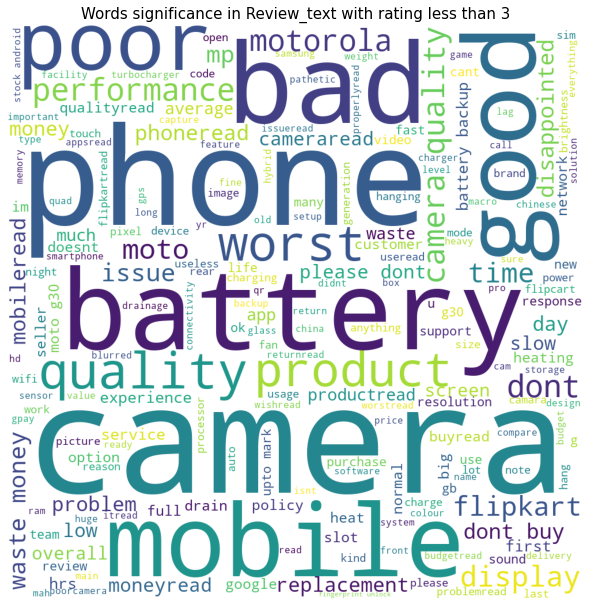

In [ ]:
# Dataframe of comments with less than 3 rating
rating_search = (1,2)
rating_lessthan3 = pd.DataFrame(moto[moto['Rating'].isin(rating_search)])

# Remove punctuations and convert Review_text into lowercase
rating_lessthan3['Review_text']  = moto['Review_text'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '').str.lower()

# Extract words from Review_text for wordcloud
words = []
for w in rating_lessthan3.Review_text: 
    words.append(w)
words = pd.Series(words).str.cat(sep = ' ')
words

# Tokenize words from Review_text
text_tokens = word_tokenize(words)

# POS tagging of words
tagged = nltk.pos_tag(text_tokens)

# Filter specific words by POS tags
selective_pos = ['NN','JJ','NNP']
selective_pos_words = []
for word,tag in tagged:
     if tag in selective_pos:
         selective_pos_words.append((word))

# Update stop words to remove the word 'not'
stop_words = set(stopwords.words('english'))
stop_words.remove('not')

# Remove stopwords from Review_text
tokens_without_sw = [word for word in selective_pos_words if not word in stop_words]
tokens_without_sw = " ".join(tokens_without_sw)

# Create word cloud
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(tokens_without_sw)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Words significance in Review_text with rating less than 3', fontsize=15)
plt.show()


In [ ]:
# Get word weightage from wordcloud
import operator
wc_count = pd.DataFrame( sorted(WordCloud().process_text(tokens_without_sw).items(), key=operator.itemgetter(1),reverse=True))
wc_count.head()

,0,1
0,camera,86
1,phone,69
2,battery,43
3,bad,43
4,good,35


Camera is the topmost feature, customers are not happy with.

## **Q8. Is there a problem with battery performance?**


Yes there is issue with the battery as per the wordcloud

## **Q9. Get "Review_text" with Ratings < 3. Exclude the word ‘not’ from list of stopwords. Remove stopwords and punctuations. Which is the most frequent bigram?**

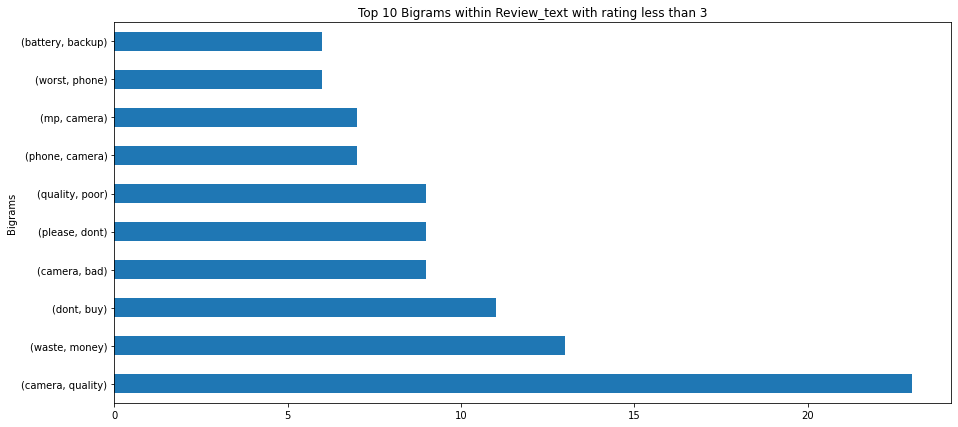

In [ ]:
# Dataframe of comments with less than 3 rating
rating_search = (1,2)
rating_lessthan3 = pd.DataFrame(moto[moto['Rating'].isin(rating_search)])

# Remove punctuations and convert Review_text into lowercase
rating_lessthan3['Review_text']  = moto['Review_text'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '').str.lower()

# Extract words from Review_text for wordcloud
words = []
for w in rating_lessthan3.Review_text: 
    words.append(w)
words = pd.Series(words).str.cat(sep = ' ')
words

# Tokenize words from Review_text
text_tokens = word_tokenize(words)

# Update stop words to remove the word 'not'
stop_words = set(stopwords.words('english'))
stop_words.remove('not')

# Remove stopwords from Review_text
tokens_without_sw = [word for word in selective_pos_words if not word in stop_words]
tokens_without_sw = " ".join(tokens_without_sw)

tokens = nltk.word_tokenize(tokens_without_sw)
# Tokenize words in bigrams
tokens_bi = nltk.bigrams(tokens)
tokens_bi_dist = nltk.FreqDist(tokens_bi)

# Create dataframe from NLTK frequency distribution
tokens_bi_dist = pd.DataFrame.from_dict(tokens_bi_dist, orient='index')
tokens_bi_dist.columns = ['Frequency']
tokens_bi_dist.index.name = 'Bigrams'
tokens_bi_dist = tokens_bi_dist.sort_values(by='Frequency',ascending=False).head(10)

# Bar plot for Top 10 Bigrams
tokens_bi_dist.plot(kind='barh', title='Top 10 Bigrams within Review_text with rating less than 3',legend=False,)
# Reshape when plot object already exist
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.show(fig)



The most frequent bigram is (camera,quality)